In [1]:
# Import the ParFlow package
#
from parflow import Run
import os
import shutil
from parflow.tools.fs import mkdir, cp, chdir, get_absolute_path, rm, exists

print(os.getcwd())
relative_path_to_runfolder = 'output_wb'
base = get_absolute_path(relative_path_to_runfolder)
print(base)

# copy CLM files
cp('inputs/drv_clmin.dat', 'output_wb/drv_clmin.dat')
cp('inputs/drv_vegm.dat', 'output_wb/drv_vegm.dat')
cp('inputs/drv_vegp.dat', 'output_wb/drv_vegp.dat')


# Set our Run Name 
PFCLM_SC = Run("PFCLM_SC")


#stopt = 8760
## run only for 24 hours for the water balance example
stopt = 24

#-----------------------------------------------------------------------------
# File input version number
#-----------------------------------------------------------------------------
PFCLM_SC.FileVersion = 4

#-----------------------------------------------------------------------------
# Process Topology
#-----------------------------------------------------------------------------

PFCLM_SC.Process.Topology.P = 1
PFCLM_SC.Process.Topology.Q = 1
PFCLM_SC.Process.Topology.R = 1

#-----------------------------------------------------------------------------
# Computational Grid
#-----------------------------------------------------------------------------
PFCLM_SC.ComputationalGrid.Lower.X = 0.0
PFCLM_SC.ComputationalGrid.Lower.Y = 0.0
PFCLM_SC.ComputationalGrid.Lower.Z = 0.0

PFCLM_SC.ComputationalGrid.DX      = 2.0
PFCLM_SC.ComputationalGrid.DY      = 2.0
PFCLM_SC.ComputationalGrid.DZ      = 0.1

PFCLM_SC.ComputationalGrid.NX      = 1
PFCLM_SC.ComputationalGrid.NY      = 1
PFCLM_SC.ComputationalGrid.NZ      = 20

#-----------------------------------------------------------------------------
# The Names of the GeomInputs
#-----------------------------------------------------------------------------
PFCLM_SC.GeomInput.Names = 'domain_input'

#-----------------------------------------------------------------------------
# Domain Geometry Input
#-----------------------------------------------------------------------------
PFCLM_SC.GeomInput.domain_input.InputType = 'Box'
PFCLM_SC.GeomInput.domain_input.GeomName  = 'domain'

#-----------------------------------------------------------------------------
# Domain Geometry
#-----------------------------------------------------------------------------
PFCLM_SC.Geom.domain.Lower.X = 0.0
PFCLM_SC.Geom.domain.Lower.Y = 0.0
PFCLM_SC.Geom.domain.Lower.Z = 0.0

PFCLM_SC.Geom.domain.Upper.X = 2.0
PFCLM_SC.Geom.domain.Upper.Y = 2.0
PFCLM_SC.Geom.domain.Upper.Z = 2.0

PFCLM_SC.Geom.domain.Patches = 'x_lower x_upper y_lower y_upper z_lower z_upper'


#--------------------------------------------
# variable dz assignments
#------------------------------------------

PFCLM_SC.Solver.Nonlinear.VariableDz = True
PFCLM_SC.dzScale.GeomNames           = 'domain'
PFCLM_SC.dzScale.Type                = 'nzList'
PFCLM_SC.dzScale.nzListNumber        = 20

# cells start at the bottom (0) and moves up to the top
# domain is 3.21 m thick, root zone is down to 19 cells 
# so the root zone is 2.21 m thick
PFCLM_SC.Cell._0.dzScale.Value  = 10.0   # first cell is 10*0.1 1m thick
PFCLM_SC.Cell._1.dzScale.Value  = 5.0    # next cell is 5*0.1 50 cm thick
PFCLM_SC.Cell._2.dzScale.Value  = 1.0   
PFCLM_SC.Cell._3.dzScale.Value  = 1.0
PFCLM_SC.Cell._4.dzScale.Value  = 1.0
PFCLM_SC.Cell._5.dzScale.Value  = 1.0
PFCLM_SC.Cell._6.dzScale.Value  = 1.0
PFCLM_SC.Cell._7.dzScale.Value  = 1.0
PFCLM_SC.Cell._8.dzScale.Value  = 1.0
PFCLM_SC.Cell._9.dzScale.Value  = 1.0
PFCLM_SC.Cell._10.dzScale.Value = 1.0
PFCLM_SC.Cell._11.dzScale.Value = 1.0
PFCLM_SC.Cell._12.dzScale.Value = 1.0
PFCLM_SC.Cell._13.dzScale.Value = 1.0
PFCLM_SC.Cell._14.dzScale.Value = 1.0
PFCLM_SC.Cell._15.dzScale.Value = 1.0
PFCLM_SC.Cell._16.dzScale.Value = 1.0
PFCLM_SC.Cell._17.dzScale.Value = 1.0
PFCLM_SC.Cell._18.dzScale.Value = 1.0
PFCLM_SC.Cell._19.dzScale.Value = 0.1   #0.1* 0.1 = 0.01  1 cm top layer

#-----------------------------------------------------------------------------
# Perm
#-----------------------------------------------------------------------------
PFCLM_SC.Geom.Perm.Names              = 'domain'
PFCLM_SC.Geom.domain.Perm.Type        = 'Constant'
PFCLM_SC.Geom.domain.Perm.Value       = 0.001465
PFCLM_SC.Geom.domain.Perm.Value       = 0.1465

PFCLM_SC.Perm.TensorType              = 'TensorByGeom'
PFCLM_SC.Geom.Perm.TensorByGeom.Names = 'domain'
PFCLM_SC.Geom.domain.Perm.TensorValX  = 1.0
PFCLM_SC.Geom.domain.Perm.TensorValY  = 1.0
PFCLM_SC.Geom.domain.Perm.TensorValZ  = 1.0

#-----------------------------------------------------------------------------
# Specific Storage
#-----------------------------------------------------------------------------

PFCLM_SC.SpecificStorage.Type              = 'Constant'
PFCLM_SC.SpecificStorage.GeomNames         = 'domain'
PFCLM_SC.Geom.domain.SpecificStorage.Value = 1.0e-4

#-----------------------------------------------------------------------------
# Phases
#-----------------------------------------------------------------------------

PFCLM_SC.Phase.Names = 'water'

PFCLM_SC.Phase.water.Density.Type     = 'Constant'
PFCLM_SC.Phase.water.Density.Value    = 1.0

PFCLM_SC.Phase.water.Viscosity.Type   = 'Constant'
PFCLM_SC.Phase.water.Viscosity.Value  = 1.0

#-----------------------------------------------------------------------------
# Contaminants
#-----------------------------------------------------------------------------
PFCLM_SC.Contaminants.Names = ''


#-----------------------------------------------------------------------------
# Gravity
#-----------------------------------------------------------------------------

PFCLM_SC.Gravity = 1.0

#-----------------------------------------------------------------------------
# Setup timing info
#-----------------------------------------------------------------------------

PFCLM_SC.TimingInfo.BaseUnit     = 1.0
PFCLM_SC.TimingInfo.StartCount   = 0
PFCLM_SC.TimingInfo.StartTime    = 0.0
PFCLM_SC.TimingInfo.StopTime     = stopt
PFCLM_SC.TimingInfo.DumpInterval = 1.0
PFCLM_SC.TimeStep.Type           = 'Constant'
PFCLM_SC.TimeStep.Value          = 1.0


#-----------------------------------------------------------------------------
# Porosity
#-----------------------------------------------------------------------------

PFCLM_SC.Geom.Porosity.GeomNames    = 'domain'

PFCLM_SC.Geom.domain.Porosity.Type  = 'Constant'
PFCLM_SC.Geom.domain.Porosity.Value = 0.3

#-----------------------------------------------------------------------------
# Domain
#-----------------------------------------------------------------------------
PFCLM_SC.Domain.GeomName = 'domain'

#-----------------------------------------------------------------------------
# Mobility
#-----------------------------------------------------------------------------
PFCLM_SC.Phase.water.Mobility.Type  = 'Constant'
PFCLM_SC.Phase.water.Mobility.Value = 1.0

#-----------------------------------------------------------------------------
# Relative Permeability
#-----------------------------------------------------------------------------

PFCLM_SC.Phase.RelPerm.Type        = 'VanGenuchten'
PFCLM_SC.Phase.RelPerm.GeomNames   = 'domain'

PFCLM_SC.Geom.domain.RelPerm.Alpha = 2.0
PFCLM_SC.Geom.domain.RelPerm.N     = 2.0

#---------------------------------------------------------
# Saturation
#---------------------------------------------------------

PFCLM_SC.Phase.Saturation.Type        = 'VanGenuchten'
PFCLM_SC.Phase.Saturation.GeomNames   = 'domain'

PFCLM_SC.Geom.domain.Saturation.Alpha = 2.0
PFCLM_SC.Geom.domain.Saturation.N     = 3.0
PFCLM_SC.Geom.domain.Saturation.SRes  = 0.2
PFCLM_SC.Geom.domain.Saturation.SSat  = 1.0

#-----------------------------------------------------------------------------
# Wells
#-----------------------------------------------------------------------------
PFCLM_SC.Wells.Names = ''


#-----------------------------------------------------------------------------
# Time Cycles
#-----------------------------------------------------------------------------
PFCLM_SC.Cycle.Names = 'constant'
PFCLM_SC.Cycle.constant.Names = 'alltime'
PFCLM_SC.Cycle.constant.alltime.Length = 1
PFCLM_SC.Cycle.constant.Repeat = -1

#-----------------------------------------------------------------------------
# Boundary Conditions: Pressure
#-----------------------------------------------------------------------------
PFCLM_SC.BCPressure.PatchNames = 'x_lower x_upper y_lower y_upper z_lower z_upper'

PFCLM_SC.Patch.x_lower.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.x_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.x_lower.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.y_lower.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.y_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.y_lower.BCPressure.alltime.Value = 0.0

#PFCLM_SC.Patch.z_lower.BCPressure.Type = 'FluxConst'
PFCLM_SC.Patch.z_lower.BCPressure.Type          = 'DirEquilRefPatch'
PFCLM_SC.Patch.z_lower.BCPressure.RefGeom       = 'domain'
PFCLM_SC.Patch.z_lower.BCPressure.RefPatch      = 'z_lower'
PFCLM_SC.Patch.z_lower.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.z_lower.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.x_upper.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.x_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.x_upper.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.y_upper.BCPressure.Type          = 'FluxConst'
PFCLM_SC.Patch.y_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.y_upper.BCPressure.alltime.Value = 0.0

PFCLM_SC.Patch.z_upper.BCPressure.Type          = 'OverlandFlow'
PFCLM_SC.Patch.z_upper.BCPressure.Cycle         = 'constant'
PFCLM_SC.Patch.z_upper.BCPressure.alltime.Value = 0.0

#---------------------------------------------------------
# Topo slopes in x-direction
#---------------------------------------------------------

PFCLM_SC.TopoSlopesX.Type              = 'Constant'
PFCLM_SC.TopoSlopesX.GeomNames         = 'domain'
PFCLM_SC.TopoSlopesX.Geom.domain.Value = 0.05

#---------------------------------------------------------
# Topo slopes in y-direction
#---------------------------------------------------------

PFCLM_SC.TopoSlopesY.Type              = 'Constant'
PFCLM_SC.TopoSlopesY.GeomNames         = 'domain'
PFCLM_SC.TopoSlopesY.Geom.domain.Value = 0.00

#---------------------------------------------------------
# Mannings coefficient
#---------------------------------------------------------

PFCLM_SC.Mannings.Type               = 'Constant'
PFCLM_SC.Mannings.GeomNames          = 'domain'
PFCLM_SC.Mannings.Geom.domain.Value  = 2.e-6

#-----------------------------------------------------------------------------
# Phase sources:
#-----------------------------------------------------------------------------

PFCLM_SC.PhaseSources.water.Type              = 'Constant'
PFCLM_SC.PhaseSources.water.GeomNames         = 'domain'
PFCLM_SC.PhaseSources.water.Geom.domain.Value = 0.0

#-----------------------------------------------------------------------------
# Exact solution specification for error calculations
#-----------------------------------------------------------------------------

PFCLM_SC.KnownSolution = 'NoKnownSolution'

#-----------------------------------------------------------------------------
# Set solver parameters
#-----------------------------------------------------------------------------

PFCLM_SC.Solver         = 'Richards'
PFCLM_SC.Solver.MaxIter = 9000

PFCLM_SC.Solver.Nonlinear.MaxIter           = 100
PFCLM_SC.Solver.Nonlinear.ResidualTol       = 1e-5
PFCLM_SC.Solver.Nonlinear.EtaChoice         = 'Walker1'
PFCLM_SC.Solver.Nonlinear.EtaValue          = 0.01
PFCLM_SC.Solver.Nonlinear.UseJacobian       = False
PFCLM_SC.Solver.Nonlinear.DerivativeEpsilon = 1e-12
PFCLM_SC.Solver.Nonlinear.StepTol           = 1e-30
PFCLM_SC.Solver.Nonlinear.Globalization     = 'LineSearch'
PFCLM_SC.Solver.Linear.KrylovDimension      = 100
PFCLM_SC.Solver.Linear.MaxRestarts          = 5
PFCLM_SC.Solver.Linear.Preconditioner       = 'PFMG'
PFCLM_SC.Solver.PrintSubsurf                = False
PFCLM_SC.Solver.Drop                        = 1E-20
PFCLM_SC.Solver.AbsTol                      = 1E-9

#Writing output options for ParFlow
write_pfb = True  #only PFB output for water balance example
#  PFB  no SILO
PFCLM_SC.Solver.PrintSubsurfData         = write_pfb
PFCLM_SC.Solver.PrintPressure            = write_pfb
PFCLM_SC.Solver.PrintSaturation          = write_pfb
PFCLM_SC.Solver.PrintCLM                 = write_pfb
PFCLM_SC.Solver.PrintMask                = write_pfb
PFCLM_SC.Solver.PrintSpecificStorage     = write_pfb
PFCLM_SC.Solver.PrintEvapTrans           = write_pfb

PFCLM_SC.Solver.WriteSiloMannings        = False
PFCLM_SC.Solver.WriteSiloMask            = False
PFCLM_SC.Solver.WriteSiloSlopes          = False
PFCLM_SC.Solver.WriteSiloSaturation      = False

#write output in NetCDF
write_netcdf = False
#PFCLM_SC.NetCDF.NumStepsPerFile          = 240
PFCLM_SC.NetCDF.WritePressure            = write_netcdf
PFCLM_SC.NetCDF.WriteSubsurface          = False
PFCLM_SC.NetCDF.WriteSaturation          = write_netcdf
PFCLM_SC.NetCDF.WriteCLM                 = write_netcdf
#PFCLM_SC.NetCDF.CLMNumStepsPerFile       = 240


#---------------------------------------------------
# LSM / CLM options
#---------------------------------------------------

# set LSM options to CLM
PFCLM_SC.Solver.LSM              = 'CLM'
# specify type of forcing, file name and location
PFCLM_SC.Solver.CLM.MetForcing   = '1D'
#PFCLM_SC.Solver.CLM.MetFileName = 'forcing_1.txt'
PFCLM_SC.Solver.CLM.MetFileName  = 'narr_1hr.txt'
#PFCLM_SC.Solver.CLM.MetFileName  = 'pumphouse_forcing_wy17_wy19.txt'
PFCLM_SC.Solver.CLM.MetFilePath  = '../forcing'

# Set CLM Plant Water Use Parameters
PFCLM_SC.Solver.CLM.EvapBeta       = 'Linear'
PFCLM_SC.Solver.CLM.VegWaterStress = 'Saturation'
PFCLM_SC.Solver.CLM.ResSat         = 0.2
PFCLM_SC.Solver.CLM.WiltingPoint   = 0.2
PFCLM_SC.Solver.CLM.FieldCapacity  = 1.00
PFCLM_SC.Solver.CLM.IrrigationType = 'none'
PFCLM_SC.Solver.CLM.RootZoneNZ     =  19
PFCLM_SC.Solver.CLM.SoiLayer       =  15

#Writing output options for CLM
#  no SILO, no native CLM logs
PFCLM_SC.Solver.PrintLSMSink        = False
PFCLM_SC.Solver.CLM.CLMDumpInterval = 1
PFCLM_SC.Solver.CLM.CLMFileDir      = 'output/'
PFCLM_SC.Solver.CLM.BinaryOutDir    = False
PFCLM_SC.Solver.CLM.IstepStart      = 1
PFCLM_SC.Solver.WriteCLMBinary      = False
PFCLM_SC.Solver.WriteSiloCLM        = False
PFCLM_SC.Solver.CLM.WriteLogs       = False
PFCLM_SC.Solver.CLM.WriteLastRST    = True
PFCLM_SC.Solver.CLM.DailyRST        = False
PFCLM_SC.Solver.CLM.SingleFile      = True
#PFCLM_SC.NetCDF.Compression         = True
#PFCLM_SC.NetCDF.ROMIOhints='romio.hints'
#PFCLM_SC.NetCDF.NodeLevelIO         = True

#---------------------------------------------------
# Initial conditions: water pressure
#---------------------------------------------------

PFCLM_SC.ICPressure.Type                 = 'HydroStaticPatch'
PFCLM_SC.ICPressure.GeomNames            = 'domain'
PFCLM_SC.Geom.domain.ICPressure.Value    = -1.0
PFCLM_SC.Geom.domain.ICPressure.RefGeom  = 'domain'
PFCLM_SC.Geom.domain.ICPressure.RefPatch = 'z_upper'

#-----------------------------------------------------------------------------
# Run ParFlow 
#-----------------------------------------------------------------------------

PFCLM_SC.run(working_directory=base)


/Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc
/Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc/output_wb

# ==============================================================================
# ParFlow directory
#  - /Users/reed/parflow/parflow.v3.10.0
# ParFlow version
#  - 3.10.0
# Working directory
#  - /Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc/output_wb
# ParFlow database
#  - PFCLM_SC.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully 💦 💦 💦 
# ==============================================================================



/Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc
/Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc/output_wb
/Users/reed/Projects/parflow_python_shortcourse/exercises/pfclm_sc/forcing
  - qflx_tran_vegm

Table of water balance values:
 balance    balance2   evap_trans residual   residual2
 1.734e-01  0.000e+00  0.000e+00  1.734e-01  0.000e+00
-2.771e-01 -2.771e-01 -2.771e-01  5.551e-17  5.551e-17
-2.136e-01 -2.136e-01 -2.136e-01 -2.776e-17 -2.776e-17
-5.309e-02 -5.309e-02 -5.309e-02  1.388e-17  6.939e-18
 9.531e-02  9.531e-02  9.531e-02  1.388e-17  0.000e+00
 2.306e-01  2.306e-01  2.306e-01  2.776e-17  0.000e+00
 3.188e-01  3.188e-01  3.188e-01  0.000e+00  0.000e+00
 4.034e-01  4.034e-01  4.034e-01 -1.110e-16 -1.110e-16
 4.844e-01  4.752e-01  4.752e-01  9.212e-03 -5.551e-17
 4.037e-01  3.715e-01  3.715e-01  3.221e-02  0.000e+00
 3.193e-01  2.678e-01  2.678e-01  5.145e-02  5.551e-17
 2.316e-01  1.642e-01  1.642e-01  6.746e-02 -2.776e-17
-6.085e-02 -6.0

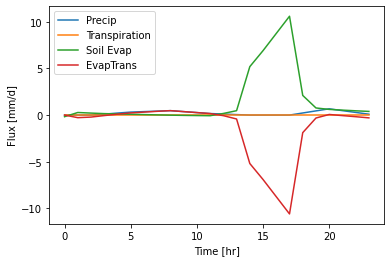

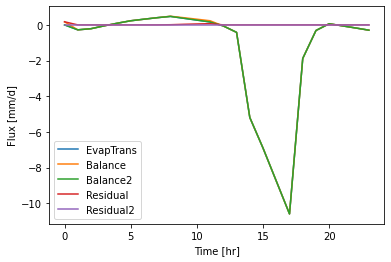

In [2]:
## load PFCLM output and conduct a detailed water balance

import parflow as pf
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import time as timer
from parflow.tools.fs import get_absolute_path
from glob import glob
import pandas as pd
import parflow as pf
from pathlib import Path

from parflow import Run
import parflow.tools.hydrology as hydro

path = ''
current_dir = os.getcwd()
print(current_dir)
relative_path_to_runfolder = 'output_wb'
path = current_dir+'/'+relative_path_to_runfolder
print(path)

path_forcing = current_dir+'/forcing'
print(path_forcing)

# load in the run information from the PFIDB file
run_name = 'PFCLM_SC'
run = Run.from_definition(f'{path}/{run_name}.pfidb')
data = run.data_accessor
nx = data.shape[2]
ny = data.shape[1]
nz = data.shape[0]
dx = data.dx
dy = data.dy
dz = data.dz


# intialize data and time arrays
data    = np.zeros([8,8760])
time    = np.zeros([8760])

#CLM data array format 
# reading the CLM file PFCLM_SC.out.clm_output.<file number>.C.pfb
# variables are by layer:
# 0 eflx_lh_tot:  total latent heat flux (Wm-2)  
# 1 eflx_lwrad_out: total upward LW radiation (Wm-2)  
# 2 eflx_sh_tot: total sensible heat flux (Wm-2)  
# 3 eflx_soil_grnd: ground heat flux (Wm-2)    
# 4 qflx_evap_tot: net veg. evaporation and transpiration and soil evaporation (mms-1)  
# 5 qflx_evap_grnd: ground evaporation (mms-1)   
# 6 qflx_evap_soi: soil evaporation (mms-1)   
# 7 qflx_evap_veg: vegetation evaporation (canopy) and transpiration (mms-1)   
# 8 qflx_tran_veg: transpiration (mms-1)  
# 9 qflx_infl: infiltration flux (mms-1)   
# 10 swe_out: SWE (mm)   
# 11 t_grnd: ground temperature (K)  
# 12 irrigation flux
# 13 - 24 Soil temperature by layer (K)


#  assemble files to be loaded as an entire sequence
# then map specific variables to the data array which holds things for analysis
# and plotting

files = glob(path+"/PFCLM_SC.out.clm_output.*.C.pfb")
#print(files[0,10])
CLM_data = pf.read_pfb_sequence(files)

## create data frame for CLM output ET vars
clm_output = pd.DataFrame({'T [mm/s]':CLM_data[:,8,0,0],'Ebs [mm/s]':CLM_data[:,6,0,0],'Qflux infil [mm/s]':CLM_data[:,9,0,0],'Qflux irrig [mm/s]':CLM_data[:,12,0,0],'qflx_evap_grnd [mm/s]':CLM_data[:,5,0,0] })
## the variables we use here are chosen to represent the fluxes passed to ParFlow, detailed below

## load in the evaptrans output, this is constructed in the coupling between PF and CLM as follows:
## see [pf_couple.F90](https://github.com/parflow/parflow/blob/master/pfsimulator/clm/pf_couple.F90)
## looping over the columns, t, for a depth, k, the uppermost soil layer is assigned
## the infiltration flux (qflx_infl) + irrigation water applied - transpiration (qflx_tran_veg):
#LINE 40: clm(t)%pf_flux(k)=(-clm(t)%qflx_tran_veg*clm(t)%rootfr(k)) + clm(t)%qflx_infl + clm(t)%qflx_qirr_inst(k)
## layers below this are assigned the transpiration X the root fraction.  
## Note that if there are errors in the root fraction due to incomplete resolution of the root zone (not deep enough)
## this might cause errors.
#LINE 43: clm(t)%pf_flux(k)=(-clm(t)%qflx_tran_veg*clm(t)%rootfr(k)) + clm(t)%qflx_qirr_inst(k)
## Note that the fluxes are in [mm/s] units and are converted to [m/h] 3600 [s/h] and 
## 1000 [mm/m] to be in PF units and then divided by the depth of each soil layer to be in [1/h] units:
#evap_trans(l) = clm(t)%pf_flux(k) * 3.6d0 / clm(t)%dz(k)
## note that the infiltration flux is assembled to be I-E (E is *just* bare soil evaporation) and note that I is the 
## "water that hits the ground" in CLM, so this is canopy throughfall + snowmelt and will not always equal the forcing Precip
## the qflx_infl variable is assembled in 
## [clm_hydro_soil.F90](https://github.com/parflow/parflow/blob/master/pfsimulator/clm/clm_hydro_soil.F90)
#LINE 144: clm%qflx_infl = clm%qflx_top_soil - clm%qflx_evap_grnd
## where the qflx_top_soil is the water and snow that hit the ground:
#clm_hydro_canopy.F90:     clm%qflx_rain_grnd = clm%qflx_prec_grnd  ! liquid water onto ground (mm/s)
#clm_hydro_snow.F90:     clm%qflx_top_soil = clm%qflx_rain_grnd + clm%qflx_snomelt


## assemble the evap trans files
files = glob(path+"/PFCLM_SC.out.evaptrans.*.pfb")
pf_EvapTrans = pf.read_pfb_sequence(files)

# set up an evap_trans array to hold the summed values for the evap trans output
evap_trans = np.zeros(24)
for i in range(24):
    evap_trans[i] = np.sum(pf_EvapTrans[i,:,0,0]*dz)*1000.*24  # to go from 1/h to m/h to mm/h to mm/day


# load forcing, single column, variables are
#DSWR:  Downward Visible or Short-Wave radiation [W/m2]
#DLWR:  Downward Infa-Red or Long-Wave radiation [W/m2]
#APCP:  Precipitation rate [mm/s]
#Temp:  Air temperature [K]
#UGRD:  West-to-East or U-component of wind [m/s]
#VGRD:  South-to-North or V-component of wind [m/s]
#Press: Atmospheric Pressure [pa]
#SPFH:  Water-vapor specific humidity [kg/kg]

#
file = path_forcing+"/narr_1hr.txt"
forcing_df = pd.read_csv(file,sep='\s{2,}',header=None,engine='python')
forcing_df.columns = ["DSWR [W/m2]", "DLWR [W/m2]", "APCP [mm/s]", "Temp [K]", "UGRD [m/s]","VGRD [m/s]","Press [pa]","SPFH [kg/kg]"]

# calculate a balance of water from CLM to PF
# we will calculate this two ways, using the forcing (balance) and the output of bare soil eval and Transpiration
# and using the qflux infil (balance2) and the transpiration.  We will compare these two approaches below
# note that our precip input and the flux outputs are all in [mm/s] units.  We convert to mm/d for more friendly units
balance = forcing_df['APCP [mm/s]'].iloc[0:24]*(3600*24)- (clm_output['T [mm/s]'].apply(pd.to_numeric)*(3600*24) + clm_output['Ebs [mm/s]'].apply(pd.to_numeric)*(3600*24))
balance2 = (clm_output['Qflux irrig [mm/s]'].apply(pd.to_numeric)*(3600*24)+ clm_output['Qflux infil [mm/s]'].apply(pd.to_numeric)*(3600*24))


# calculate two residuals, checked against the evap_trans values, corresponding to balance and balance2 above 
residual = (balance - evap_trans)
residual2 = (balance2 - evap_trans)

# we make a table of the water balances and corresponding residuals
print()
print("Table of water balance values:")
print(" balance    balance2   evap_trans residual   residual2")
for i in range (24):
    print('% 5.3e % 5.3e % 5.3e % 5.3e % 5.3e' % (balance[i], balance2[i],evap_trans[i],residual[i],residual2[i]))


# Plot the inputs to this water balance calculation
plt.plot(forcing_df['APCP [mm/s]'].iloc[0:24]*(3600*24), label='Precip')  
plt.plot(clm_output['T [mm/s]']*(3600*24), label='Transpiration')  
plt.plot(clm_output['Ebs [mm/s]']*(3600*24), label='Soil Evap')  
plt.plot(evap_trans, label='EvapTrans') 
plt.xlabel('Time [hr]')  
plt.ylabel('Flux [mm/d]')  ## note that we converted the fluxes to mm/d
plt.legend()
plt.show()

# Plot the different forcing term calculations, Evap Trans, and the residuals
plt.plot(evap_trans, label='EvapTrans')  
plt.plot(balance, label='Balance')  
plt.plot(balance2, label='Balance2')  
plt.plot(residual, label='Residual')  
plt.plot(residual2, label='Residual2')  
plt.xlabel('Time [hr]')  
plt.ylabel('Flux [mm/d]')  
plt.legend()
plt.show()
